# Задача Коши для систем ОДУ

Задача Коши для ОДУ первого порядка формулируется следующим образом:

$$
\left\{
\begin{aligned}
&y^\prime = f(x, y),  \quad x > 0, \\
&y(0) = y_0.
\end{aligned}
\right.
$$

Как известно, к такой форме можно привести обыкновенные уравнения порядка выше первого.

## Схема Эйлера

Существует множество способов аппроксимировать значение производной функции в точке значениями функции в соседних узлах. Для этого достаточно учесть, что

$$y(x_0 + h) = y(x_0) + h y^\prime (x_0) + o(h), \quad h \to 0.$$

Используя это соотношение, можно получить следующие способы аппроксимации дифференциального уравнения в задаче Коши разностными схемами:

$$
\frac{y_{n+1} - y_{n}}{h} = f(x_n, y_n) \; \text{ -- явная схема Эйлера;}
$$

$$
\frac{y_{n+1} - y_{n}}{h} = f(x_{n+1}, y_{н+1}) \; \text{ -- неявная схема Эйлера;}
$$

$$
\frac{y_{n+1} - y_{n-1}}{2h} = f(x_n, y_n) \; \text{ -- схема Эйлера с центральной точкой.}
$$

Наиболее удобной из представленных схем является явная схема, потому что вычисления значений в узлах проводятся последовательно. Неявная же схема и схема с центральной точкой на каждом шаге требуют решения системы нелинейных уравнений.

## Явные методы Рунге-Кутты

Описанный выше явный метод Эйлера является представителем класса методов, называемых $s$-стадийными явными методами Рунге-Кутты, где решение в общем случае имеет следующий вид:

$$
\begin{aligned}
& k_i = f \left( x_n + c_i h, y_n + h \sum_{j=1}^{i-1} a_{ij} k_j \right), \quad i=1,2,\ldots,s, \\
& y_{n+1} = y_n + h \sum_{i=1}^{s} b_i k_i.
\end{aligned}
$$

Если коэффициентам метода присвоить следующие значения $a_{11} = 0, c_1 = 0, b_1 = 1$, получится явный метод Эйлера.

Для упрощения выкладок при выборе коэффициентов принято придерживаться необязательного условия Кутты: $c_i = \sum_{j=1}^{s} a_{ij}$.

## Движение тела, брошенного под углом к горизонту

В качестве примера решим задачу о движении тела, брошенного под углом к горизонту. Для этого будем учитывать не только силу тяжести $F_{\text{тяж}} = mg$, но и силу сопротивления воздуха $F_{\text{сопр}} = -k|v|v$. В таком случае данная задача описывается следующей системой дифференциальных уравнений:

$$
\left\{
\begin{aligned}
m\ddot{r} &= mg -k|v|v, \\
r(0) &= (x_0, y_0)^T, \\
\dot{r}(0) &= (v_0 \cos \alpha, v_0 \sin \alpha)^T,
\end{aligned}
\right.
$$

Однако, в таком виде эту систему нельзя решить описанными выше методами. Тем не менее, если переписать уравнения для вектора $u = (x, y, v_x, v_y)^T$, мы получим систему ОДУ первого порядка, а именно:

$$
\left\{
\begin{aligned}
\frac{d}{dt} \left(x, y, v_x, v_y\right)^T &= \left(v_x, v_y, -\frac{k}{m}\sqrt{v_x^2 + v_y^2}, -g-\frac{k}{m}\sqrt{v_x^2 + v_y^2}\right)^T, \\
\left. \left(x, y, v_x, v_y\right)^T\right|_{t=0} &= \left(x_0, y_0, v_0 \cos \alpha, v_0 \sin \alpha\right)^T.
\end{aligned}
\right.
$$

Ниже приведен пример кода на Python для моделирования траектории движения тела с помощью явного метода Эйлера:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class ProjectileMotion:
    def __init__(self, T, M, mass, v0, k, alpha, g=9.8, x0=0.0, y0=0.0, t0=0.0):
        self.mass = mass  # Mass of the body
        self.k = k  # Friction coefficient
        self.alpha = alpha  # Launch angle
        self.g = g  # Free fall acceleration


        self.T = T  # Total simulation time
        self.M = M  # Number of intervals
        self.u = np.zeros((self.M + 1, 4)) # Solution vector

        # Set initial conditions
        self.t0 = t0
        self.v0 = v0
        self.u[0, 0] = x0
        self.u[0, 1] = y0
        self.u[0, 2] = self.v0 * np.cos(self.alpha)
        self.u[0, 3] = self.v0 * np.sin(self.alpha)

        self.tau = (self.T - self.t0) / self.M # Time step size

        self.t = np.linspace(self.t0, self.T, self.M + 1) # Time grid

    def f(self, u):
        f = np.zeros(4)

        f[0] = u[2]
        f[1] = u[3]
        f[2] = -self.k / self.mass * np.sqrt(u[2]**2 + u[3]**2) * u[2]
        f[3] = -self.g - self.k / self.mass * np.sqrt(u[2]**2 + u[3]**2) * u[3]

        return f

    def solve(self):
        for m in range(self.M):
            self.u[m + 1] = self.u[m] + self.tau * self.f(self.u[m])

        return self.u

    def plot_trajectory(self):
        plt.figure()
        plt.plot(self.u[:, 0], self.u[:, 1], '-bo', linewidth=1, markersize=2)
        plt.title('Trajectory')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

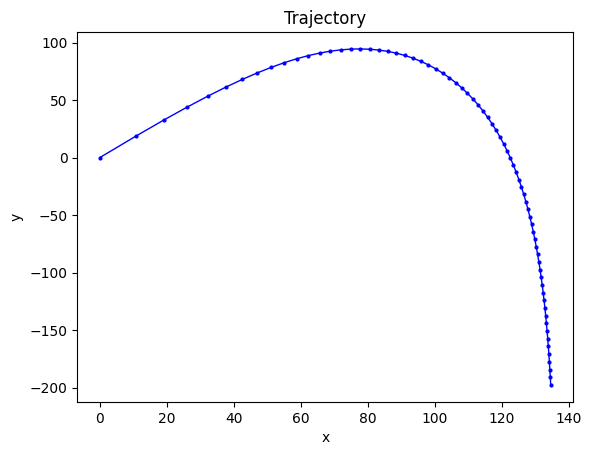

In [ ]:
v0 = 100.0
alpha = np.pi / 3
g = 9.81
k = 1.0
mass = 100.0
T = 15.0
M = 70

model = ProjectileMotion(T, M, mass, v0, k, alpha, g)
model.solve()
model.plot_trajectory()